Loading data

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Exploring data

In [ ]:
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")


We have 60000 images in the training set and 10000 images in the test set.


Shape the examples

In [ ]:
# Let's see the first sample of the training set
X_train[0].shape

(28, 28)

Visualizing the images

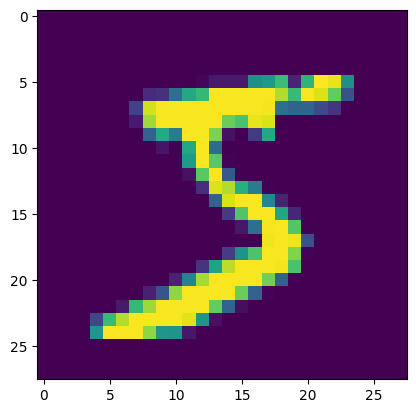

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

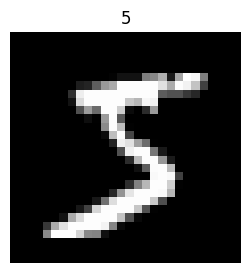

In [ ]:
# make it nicer
plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);

Plot random picked images

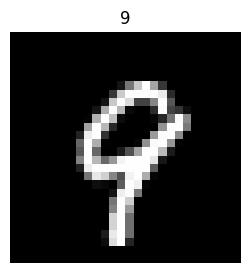

In [ ]:
import random
random_image = random.randint(0,  len(X_train))

plt.figure(figsize=(3, 3))
plt.imshow(X_train[random_image], cmap="gray")

plt.title(y_train[random_image])
plt.axis(False);

Processing the data

In [ ]:
X_train.shape

(60000, 28, 28)

Reshape the data

In [ ]:
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1, ))

X_train.shape

(60000, 28, 28, 1)

Normalize the train and test images

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

Change datatype (float32 -> float65)

In [ ]:
import numpy as np
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

Convolutional model using Keras Sequential API

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
	layers.Conv2D(filters=10,
				kernel_size=3, 
				activation="relu", 
				input_shape=(28,  28,  1)),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Conv2D(10,  3, activation="relu"),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Flatten(),
	layers.Dense(10, activation="softmax")
])

Summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                    

Compile the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
			optimizer=tf.keras.optimizers.Adam(),
			metrics=["accuracy"])

Train the model

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2701 - accuracy: 0.9180
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0940 - accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0694 - accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0566 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0492 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0431 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0386 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0351 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 10/10
1875/1875 [==============================] - 47s 25m

Evaluate the mdoel

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0388 - accuracy: 0.9881


[0.03875613212585449, 0.988099992275238]

Save model to use it later in the app

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/digit-recognizer.h5'

model.save(file_path)

Mounted at /content/drive


NameError: ignored